In [1]:
import soundfile as sf # flac file
import pandas as pd
import numpy as np
import tarfile, csv

In [2]:
y_df = []
lines = ''
with tarfile.open("dev-clean.tar.gz").extractfile("LibriSpeech/CHAPTERS.TXT") as f:
    lines = f.read().decode("utf-8")
    for line in lines.split('\n'):
        if len(line)>0 and line[0]!=';':
            y_df.append(list(map(str.strip, line.split('|'))))


In [3]:
y_data = pd.DataFrame(y_df)
y_data.head()

,0,1,2,3,4,5,6,7
0,1,110,19.77,train-other-500,53,1023,In Chancery,Bleak House
1,2,110,10.30,train-other-500,53,1023,In Fashion,Bleak House
2,159,4174,7.67,train-other-500,68,2184,Letter XXV,Unbeaten Tracks in Japan
3,198,19,8.42,train-clean-100,219,121,Chapter 01,Northanger Abbey
4,199,98,11.68,train-clean-360,219,121,Chapter 02,Northanger Abbey


In [4]:
y_data.columns = ['ch_id','reader','minutes','subset','prj','book_id','ch_title','prj_title']
y_data = y_data[(y_data['subset']=='test-clean') | (y_data['subset']=='dev-clean') | (y_data['subset']=='train-clean-100')]
y_data.head()

,ch_id,reader,minutes,subset,prj,book_id,ch_title,prj_title
3,198,19,8.42,train-clean-100,219,121,Chapter 01,Northanger Abbey
11,209,198,8.20,train-clean-100,219,121,Chapter 12,Northanger Abbey
15,216,403,6.30,train-clean-100,219,121,Chapter 19,Northanger Abbey
16,218,89,12.78,train-clean-100,219,121,Chapter 21,Northanger Abbey
17,219,89,12.30,train-clean-100,219,121,Chapter 22,Northanger Abbey


In [5]:
max_mins = max( np.array(y_data['minutes'].astype(float)) )
print(max_mins)

25.2


In [6]:
y_data = y_data.drop(['prj','ch_title','minutes','prj_title','book_id'],axis=1)

In [7]:
y_train = y_data[y_data['subset']=='train-clean-100'].drop(['subset'],axis=1)
y_dev = y_data[y_data['subset']=='dev-clean'].drop(['subset'],axis=1)
y_test = y_data[y_data['subset']=='test-clean'].drop(['subset'],axis=1)

In [10]:
print(len(y_train),len(y_dev),len(y_test))
y_dev.head()

585 97 87


,ch_id,reader
230,4943,3752
231,4944,3752
371,8226,3536
407,9006,2902
408,9008,2902


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
import os, glob

def get_x_data(tar_file,type_,reader,ch_id,c):
    
    path = "LibriSpeech/"+type_+'/'+reader+'/'+ch_id+'/'+reader+'-'+ch_id
    trans_file = path+'.trans.txt'
       
    x_text = []
    with tarfile.open(tar_file).extractfile( trans_file ) as f:
        lines = f.read().decode("utf-8").split('\n')
        x_text.append(lines)
        l = len(lines)
        
    print("Creating dir")    
    if not os.path.exists('dataset/'+reader):
        os.mkdir('dataset/'+reader)
    last = glob.glob('dataset/'+reader+'/*.flac')
    if last == []:
        last = 0
    else:
        last = int(last[-1].split('/')[-1].split('.')[0])
        last = last + 1
    
    print("Writing file")
    x_data = []
    for i in range(l-1):
        flac_file_path = path+'-'+str(i).zfill(4)+'.flac'
        print(flac_file_path)
        
        with tarfile.open(tar_file).extractfile( flac_file_path ) as f:
            with open('dataset/'+reader+'/'+str(i+last).zfill(4)+'.flac','wb') as t:
                t.write(f.read())
                
        data, samplerate = sf.read('dataset/'+reader+'/'+str(i+last).zfill(4)+'.flac') 
        
        # plt.plot(data)
        # plt.show()
        
        x_data.append(data)
        
#     print(np.array(x_data).shape, np.array(x_text).shape)
    return x_data, x_text

In [48]:
y_dev_copy = y_dev.copy()

y_dev_readers = []
for x in list(y_dev_copy['reader']):
    if x not in y_dev_readers:
        y_dev_readers.append(x)

y_dev_group = y_dev.groupby(['reader'])
        
x_dev_final_data = []
c2 = 0
for reader in y_dev_readers: 
    x_dev_data = [[],[]]
    c = 0
    for ch_id in y_dev_group.get_group(reader)['ch_id']:    
        x_1, t_1 = get_x_data("dev-clean.tar.gz","dev-clean",reader,ch_id,c)
        x_dev_data[0] += x_1
        x_dev_data[1] += t_1
        c += 1
    x_dev_final_data.append(x_dev_data)
    if c2 == 2:
        break
    c2 += 1


Creating dir
Writing file
LibriSpeech/dev-clean/3752/4943/3752-4943-0000.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0001.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0002.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0003.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0004.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0005.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0006.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0007.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0008.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0009.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0010.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0011.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0012.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0013.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0014.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0015.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0016.flac
LibriSpeech/dev-clean/3752/4943/3752-4943-0017.flac
LibriSpeech/dev-clean/3752/4943/3752-4

LibriSpeech/dev-clean/3536/23268/3536-23268-0021.flac
LibriSpeech/dev-clean/3536/23268/3536-23268-0022.flac
LibriSpeech/dev-clean/3536/23268/3536-23268-0023.flac
LibriSpeech/dev-clean/3536/23268/3536-23268-0024.flac
LibriSpeech/dev-clean/3536/23268/3536-23268-0025.flac
LibriSpeech/dev-clean/3536/23268/3536-23268-0026.flac
LibriSpeech/dev-clean/3536/23268/3536-23268-0027.flac
LibriSpeech/dev-clean/3536/23268/3536-23268-0028.flac
LibriSpeech/dev-clean/3536/23268/3536-23268-0029.flac
LibriSpeech/dev-clean/3536/23268/3536-23268-0030.flac
Creating dir
Writing file
LibriSpeech/dev-clean/2902/9006/2902-9006-0000.flac
LibriSpeech/dev-clean/2902/9006/2902-9006-0001.flac
LibriSpeech/dev-clean/2902/9006/2902-9006-0002.flac
LibriSpeech/dev-clean/2902/9006/2902-9006-0003.flac
LibriSpeech/dev-clean/2902/9006/2902-9006-0004.flac
LibriSpeech/dev-clean/2902/9006/2902-9006-0005.flac
LibriSpeech/dev-clean/2902/9006/2902-9006-0006.flac
LibriSpeech/dev-clean/2902/9006/2902-9006-0007.flac
LibriSpeech/dev-cl

In [51]:
y_copy = y_data.copy()
y_copy.head()

,ch_id,reader,subset
3,198,19,train-clean-100
11,209,198,train-clean-100
15,216,403,train-clean-100
16,218,89,train-clean-100
17,219,89,train-clean-100


In [55]:
# y_group = y_copy.groupby(['reader'])
# y_get_reader = y_group.get_group(reader)
# y_get_reader['subset']
# print(len(y_get_reader.get_group(reader))),len(y_get_reader['subset'])

230    dev-clean
231    dev-clean
Name: subset, dtype: object

In [66]:
y_copy = y_data.copy()

y_readers = []
for x in list(y_copy['reader']):
    if x not in y_readers:
        y_readers.append(x)
    
y_group = y_copy.groupby(['reader'])
y_get_reader = y_group.get_group(reader)
subsets = y_get_reader['subset']

c2 = 0
for reader in y_readers: 
    c = 0
    for ch_id,subset in zip(y_get['ch_id'],subsets):
        try:
            get_x_data(subset+".tar.gz",subset,reader,ch_id,c)
        except:
            pass
        c += 1
    if c2 == 2:
        break
    c2 += 1

In [60]:
labels = [label.split('/')[-1] for label in glob.glob('dataset/*')]
print(np.array(labels).shape)

(3,)


In [62]:
audio_train = []
y_train = []

for label in labels:
    for audio_file in glob.glob('dataset/'+label+'/*.flac'):
        data, samplerate = sf.read(audio_file) 
        audio_train.append(np.array(data))
        y_train.append(label)
        

(200,) (200,)


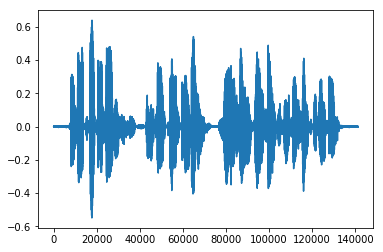

In [81]:
data, samplerate = sf.read('dataset/'+y_train[-1]+'/0000.flac') 
plt.plot(data)

audio_train = np.array(audio_train)
y_train = np.array(y_train)

print(audio_train.shape, y_train.shape)

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [102]:
model = Sequential()                                                        
model.add(Dense(32, activation='relu', input_shape=audio_train[0:1].shape))       
model.add(Dense(3, activation='softmax'))                                   
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 32)                64        
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 99        
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [109]:
print(audio_train.shape)

audio_train_ = audio_train
y_train_   = y_train.astype(np.int64)

model.fit(audio_train_, y_train_, epochs=10, batch_size=32)

(200,)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [13]:
# model.save('voice_rec.h5')

# from keras.models import load_model

# model = load_model('voice_rec.h5')
# testimage = np.array([cv2.resize(cv2.imread('.flac'),(100,100))])
# testimage.shape

In [14]:
# df = []
# lines = ''
# with tarfile.open("dev-clean.tar.gz").extractfile("LibriSpeech/SPEAKERS.TXT") as f:
#     lines = f.read().decode("utf-8")
#     for line in lines.split('\n'):
#         if len(line)>0 and line[0]!=';':
#             df.append(list(map(str.strip, line.split('|'))))

In [15]:
# data = pd.DataFrame(df)
# data = data.drop([5,6],axis=1)
# data.columns = ['id','sex','subset','minutes','name']
# data = data[(data['subset']=='test-clean') | (data['subset']=='dev-clean') | (data['subset']=='train-clean-100')]

In [16]:
# print(len(data))

# y_train = data[data['subset']=='train-clean-100']['id']
# y_dev = data[(data['subset']=='dev-clean')]['id']
# y_test = data[(data['subset']=='test-clean')]['id']

# print(len(y_train),len(y_dev),len(y_test))